Prédiction du prix d'une voiture d'occasion en utilisant la régression linéaire 

In [21]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Étape 1 : Charger les données depuis le fichier CSV
data = pd.read_csv("car data.csv")
X = data["Year"].values.reshape(-1, 1)  # Année de fabrication (indépendante)
y = data["Selling_Price"].values # Prix de vente (dépendante)
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [23]:
# Étape 2 : Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Coefficients de régression
b0 = model.intercept_  # Intercept (b0)
b1 = model.coef_[0]    # Pente (b1)

print(f"Intercept (b0) : {b0}")
print(f"Slope (b1) : {b1}")

Intercept (b0) : -831.1789245913283
Slope (b1) : 0.4150916946355396


In [24]:
# Étape 3 : Prédiction pour une voiture de l'année 2025
year_to_predict = np.array([[2025]])
predicted_price = model.predict(year_to_predict)
print(f"Prix prédit pour 2025 : {predicted_price[0]:.2f} ")

Prix prédit pour 2025 : 9.38 


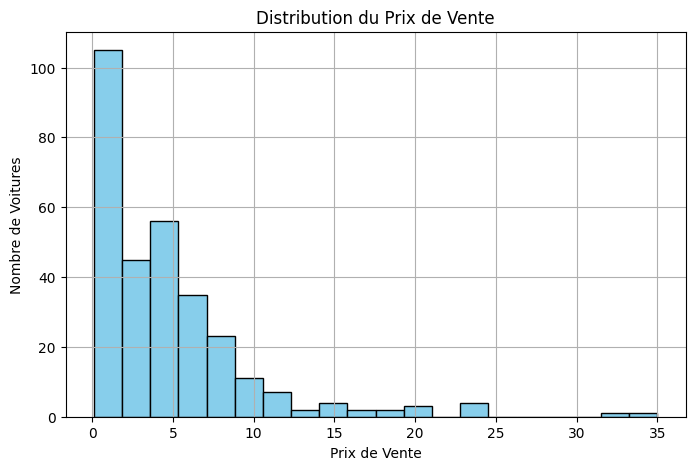

In [25]:
#Histogramme du Prix de vente 
plt.figure(figsize=(8, 5))
plt.hist(data['Selling_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution du Prix de Vente")
plt.xlabel("Prix de Vente")
plt.ylabel("Nombre de Voitures")
plt.grid(True)
plt.show()


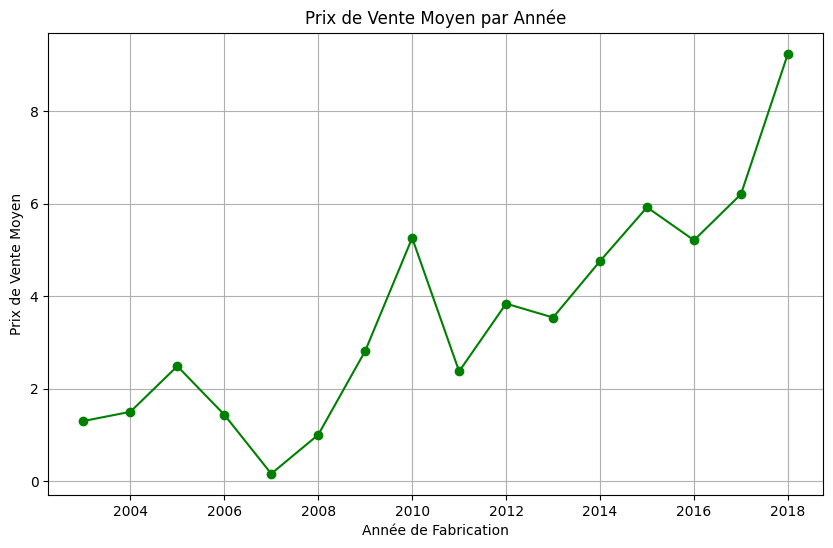

In [26]:
#Graphique en Ligne du Prix de Vente par Année
average_price_by_year = data.groupby('Year')['Selling_Price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o', linestyle='-', color='green')
plt.title("Prix de Vente Moyen par Année")
plt.xlabel("Année de Fabrication")
plt.ylabel("Prix de Vente Moyen")
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

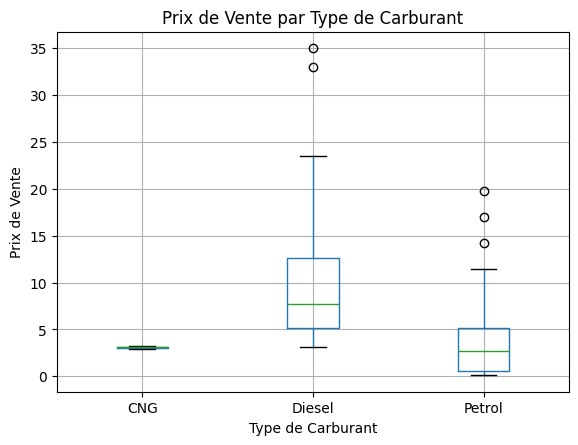

In [27]:
#Diagramme en Boîte des Prix par Type de Carburant
plt.figure(figsize=(10, 6))
data.boxplot(column='Selling_Price', by='Fuel_Type', grid=True)
plt.title("Prix de Vente par Type de Carburant")
plt.xlabel("Type de Carburant")
plt.ylabel("Prix de Vente")
plt.suptitle("")  # Supprimer le titre par défaut de matplotlib
plt.show()


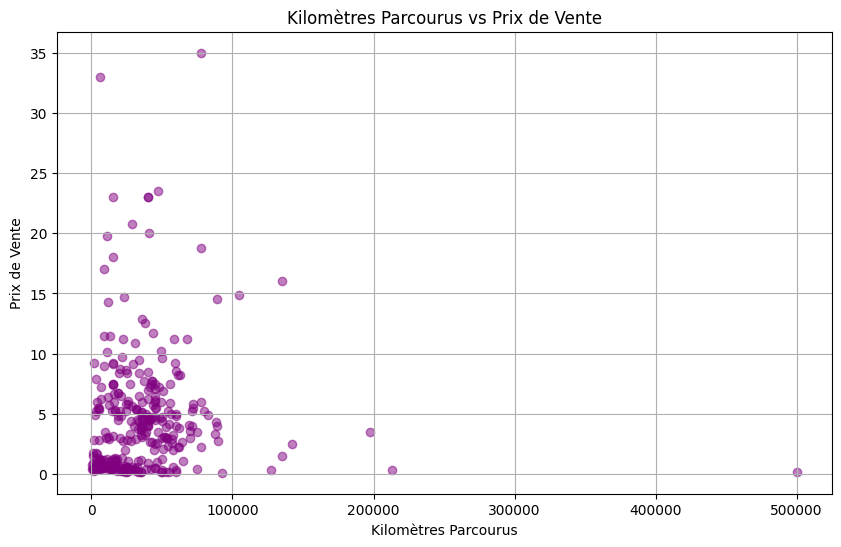

In [28]:
#Nuage de Points des Kilomètres Parcourus vs Prix de Vente
plt.figure(figsize=(10, 6))
plt.scatter(data['Kms_Driven'], data['Selling_Price'], color='purple', alpha=0.5)
plt.title("Kilomètres Parcourus vs Prix de Vente")
plt.xlabel("Kilomètres Parcourus")
plt.ylabel("Prix de Vente")
plt.grid(True)
plt.show()


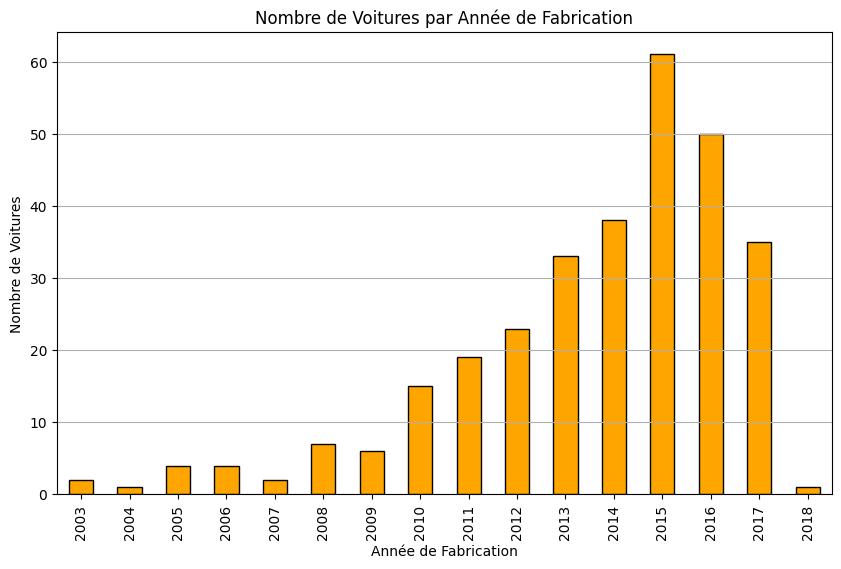

In [29]:
# Diagramme à Barres du Nombre de Voitures par Année
car_count_by_year = data['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
car_count_by_year.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Nombre de Voitures par Année de Fabrication")
plt.xlabel("Année de Fabrication")
plt.ylabel("Nombre de Voitures")
plt.grid(axis='y')
plt.show()


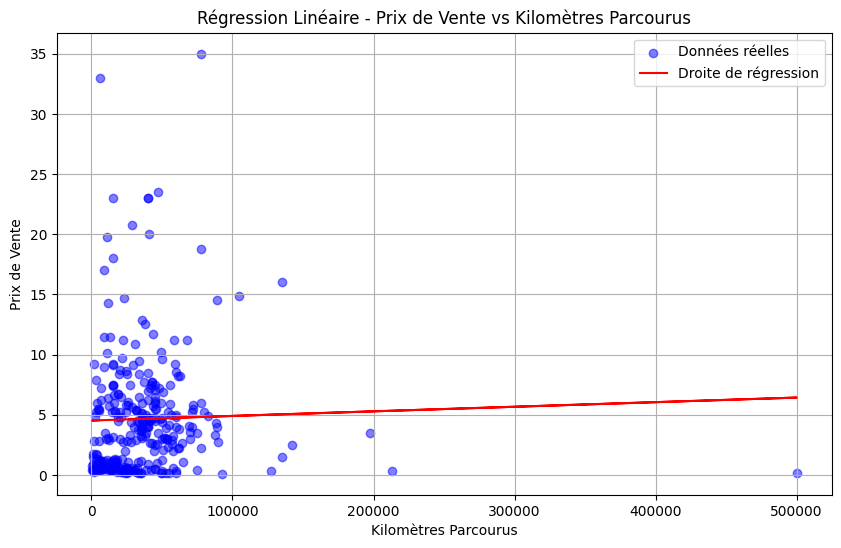

In [30]:
#Courbe de Régression pour le Prix en Fonction des Kilomètres Parcourus
X_kms = data['Kms_Driven'].values.reshape(-1, 1)
y_price = data['Selling_Price'].values

model_kms = LinearRegression()
model_kms.fit(X_kms, y_price)

plt.figure(figsize=(10, 6))
plt.scatter(X_kms, y_price, color='blue', alpha=0.5, label='Données réelles')
plt.plot(X_kms, model_kms.predict(X_kms), color='red', label='Droite de régression')
plt.title("Régression Linéaire - Prix de Vente vs Kilomètres Parcourus")
plt.xlabel("Kilomètres Parcourus")
plt.ylabel("Prix de Vente")
plt.legend()
plt.grid(True)
plt.show()


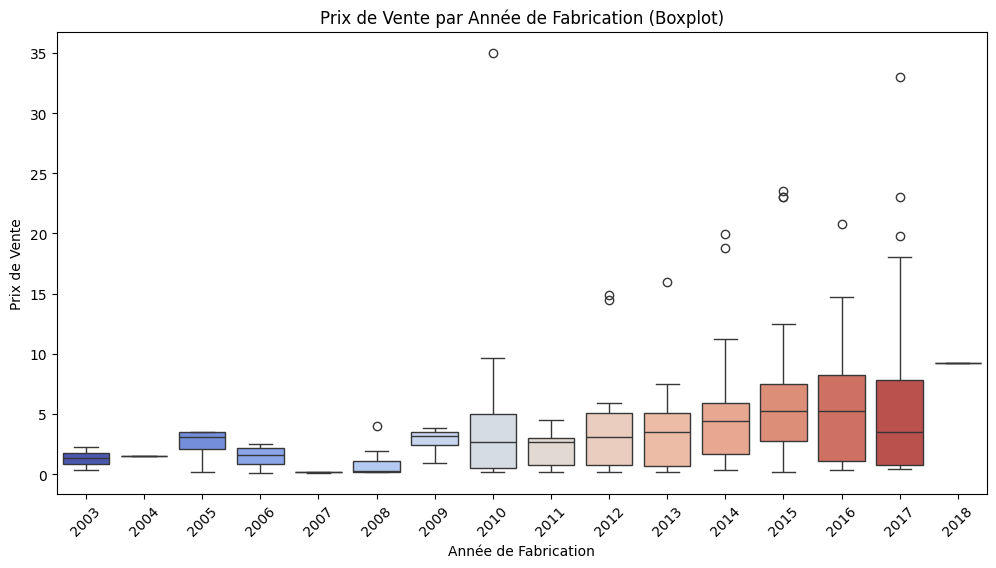

In [33]:
#Boxplot (Diagramme en Boîte) : Prix de Vente par Année
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Selling_Price', data=data, hue='Year', palette='coolwarm', legend=False)
plt.title("Prix de Vente par Année de Fabrication (Boxplot)")
plt.xlabel("Année de Fabrication")
plt.ylabel("Prix de Vente")
plt.xticks(rotation=45)
plt.show()



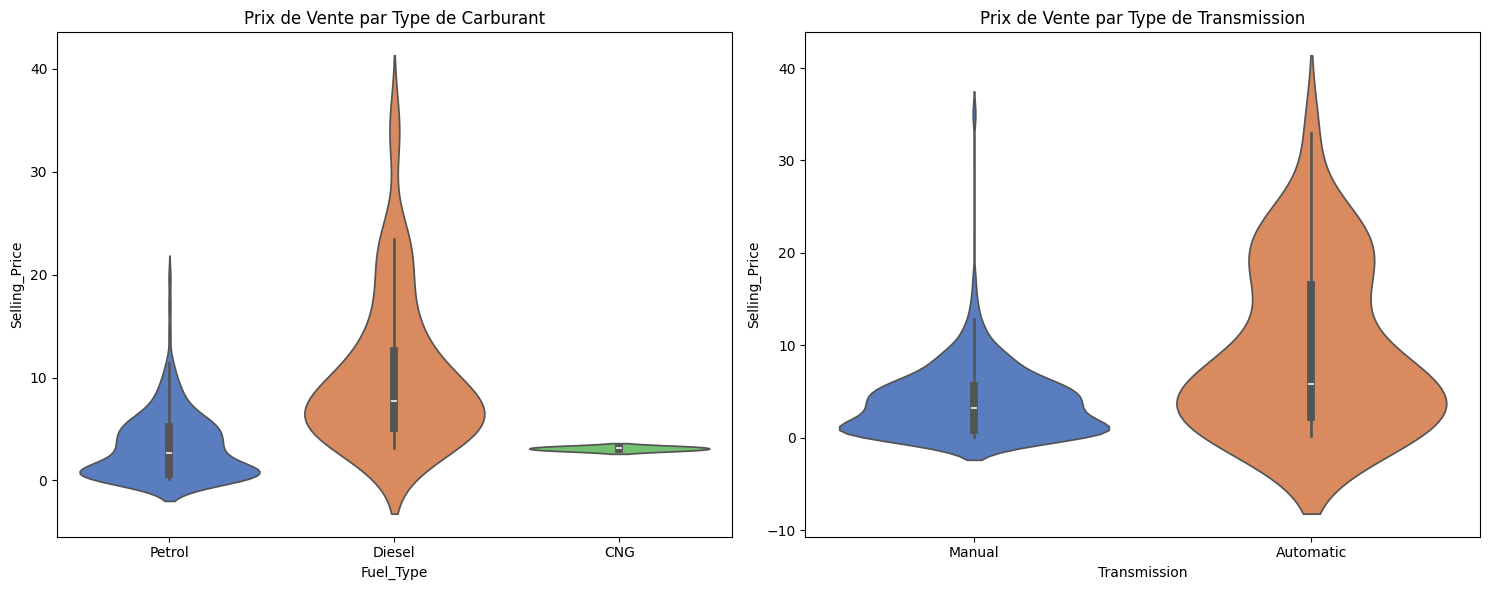

In [36]:
# Violin plot avec subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.violinplot(x='Fuel_Type', y='Selling_Price', data=data, ax=ax[0], hue='Fuel_Type', palette='muted', legend=False)
ax[0].set_title("Prix de Vente par Type de Carburant")

sns.violinplot(x='Transmission', y='Selling_Price', data=data, ax=ax[1], hue='Transmission', palette='muted', legend=False)
ax[1].set_title("Prix de Vente par Type de Transmission")

plt.tight_layout()
plt.show()


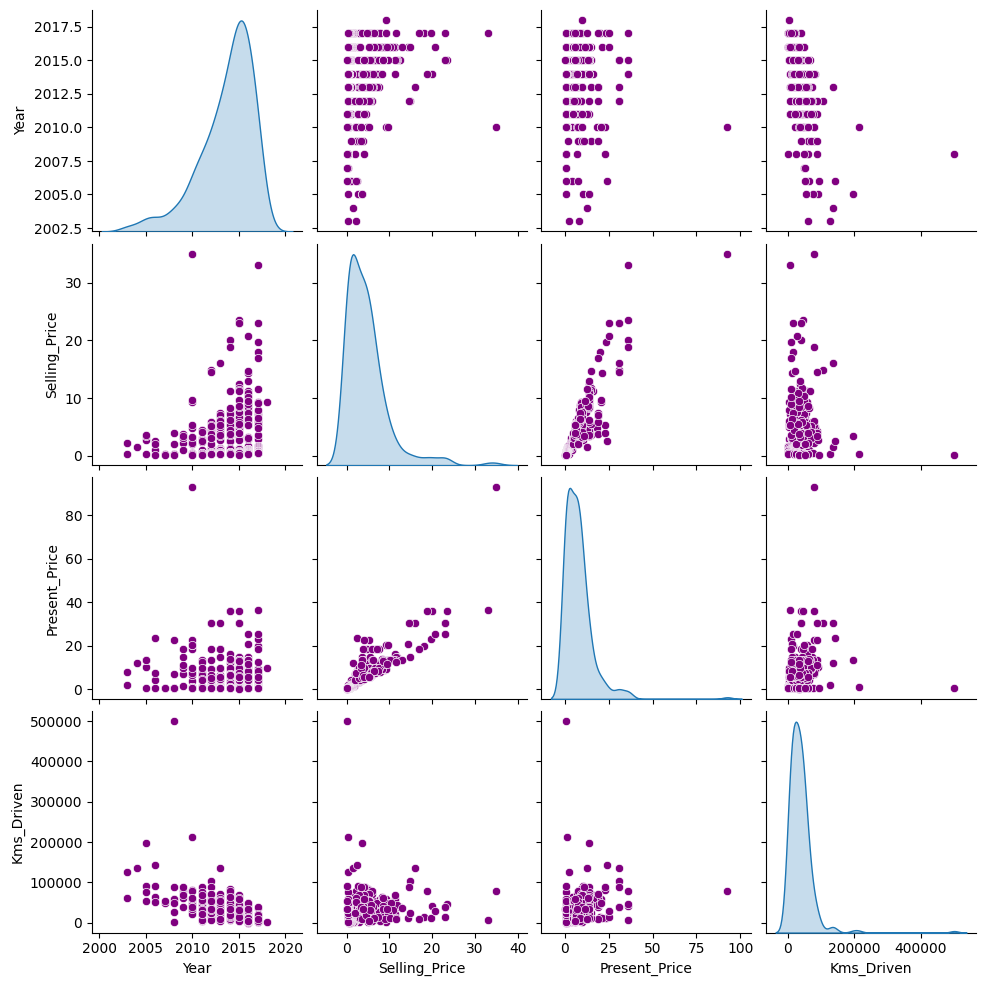

In [41]:
#Pairplot avec Diagonal KDE
sns.pairplot(data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']], diag_kind='kde', plot_kws={'color': 'purple'})
plt.show()


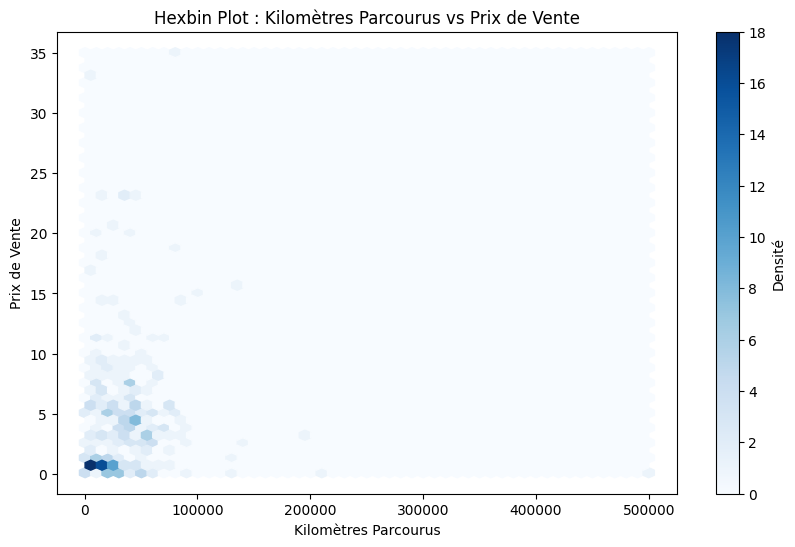

In [42]:
#Hexbin Plot : Nombre de Kilomètres vs Prix de Vente
plt.figure(figsize=(10, 6))
plt.hexbin(data['Kms_Driven'], data['Selling_Price'], gridsize=50, cmap='Blues')
plt.title("Hexbin Plot : Kilomètres Parcourus vs Prix de Vente")
plt.xlabel("Kilomètres Parcourus")
plt.ylabel("Prix de Vente")
plt.colorbar(label='Densité')
plt.show()
